In [98]:
import pandas as pd
import numpy as np

In [99]:
np.random.seed(42)

set1no = 900
set2no = 100

In [100]:
df1 = pd.DataFrame({
    "feature1": np.random.normal(loc=0, scale=1, size=set1no),
    "feature2": np.random.normal(loc=0, scale=1, size=set1no),
    "target": [0] * set1no
})
# 900 rows, 2 columns loc=mean, scale=stddev

df2 = pd.DataFrame({
    "feature1": np.random.normal(loc=5, scale=1, size=set2no),
    "feature2": np.random.normal(loc=5, scale=1, size=set2no),
    "target": [1] * set2no
})

In [101]:
df1.head()

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [102]:
df2.head()

,feature1,feature2,target
0,6.901191,5.696954,1
1,4.939339,4.666181,1
2,4.291593,6.173125,1
3,3.486286,5.369642,1
4,3.196860,4.892698,1


In [103]:
df = pd.concat([df1, df2]).reset_index(drop=True) # reset_index to avoid duplicate indices. drop=True to avoid adding old index as a column

df.shape

(1000, 3)

In [104]:
df

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,4.629989,6.070150,1
996,4.741204,4.973479,1
997,6.598647,4.118125,1
998,5.560919,4.836933,1


In [105]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [106]:
df['target'].unique()

array([0, 1])

In [107]:
# Resampling to handle class imbalance
# Upsampling the minority class
# Downsampling the majority class

In [108]:
# Upsampling

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

df_minority

,feature1,feature2,target
900,6.901191,5.696954,1
901,4.939339,4.666181,1
902,4.291593,6.173125,1
903,3.486286,5.369642,1
904,3.196860,4.892698,1
...,...,...,...
995,4.629989,6.070150,1
996,4.741204,4.973479,1
997,6.598647,4.118125,1
998,5.560919,4.836933,1


In [109]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,
                                 replace=True, # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=42) # for reproducibility

df_minority_upsampled

,feature1,feature2,target
951,6.775311,6.261922,1
992,4.563614,6.188913,1
914,4.731469,3.198942,1
971,4.785079,2.059611,1
960,4.865691,4.945106,1
...,...,...,...
952,3.806363,4.094268,1
965,3.337508,5.089581,1
976,4.437832,6.124113,1
942,4.451275,5.269127,1


In [110]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop=True)
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [111]:
df_upsampled

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,3.806363,4.094268,1
1796,3.337508,5.089581,1
1797,4.437832,6.124113,1
1798,4.451275,5.269127,1


In [112]:
# Downsampling

df_majority_downsampled = resample(df_majority,
                                   replace=True, # sample with replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42) # for reproducibility

df_majority_downsampled

,feature1,feature2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [113]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [114]:
df_downsampled

,feature1,feature2,target
0,-0.342715,0.059630,0
1,0.074095,-0.337086,0
2,0.202923,1.639965,0
3,1.441273,0.758929,0
4,1.886186,0.895193,0
...,...,...,...
195,4.629989,6.070150,1
196,4.741204,4.973479,1
197,6.598647,4.118125,1
198,5.560919,4.836933,1


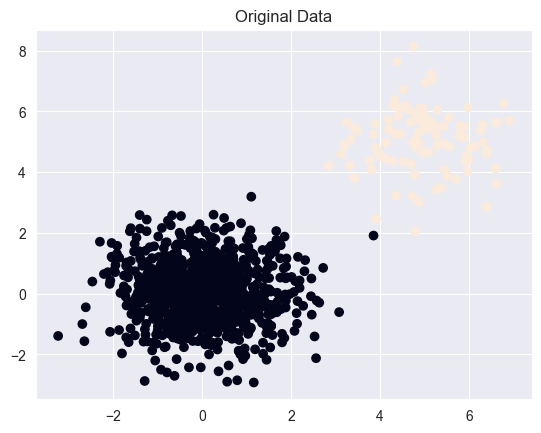

In [115]:
import matplotlib.pyplot as plt

plt.scatter(df['feature1'], df['feature2'], c=df['target'])
plt.title('Original Data')
plt.show()


In [116]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

(X, y) = oversample.fit_resample(df[['feature1', 'feature2']], df['target'])

In [117]:
X

,feature1,feature2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,5.701868,4.826691
1796,6.545917,3.664057
1797,6.358114,4.774219
1798,5.486916,4.852372


In [118]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [119]:
oversample_df = pd.concat([X, y], axis=1) # axis=1 to concatenate columns
oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

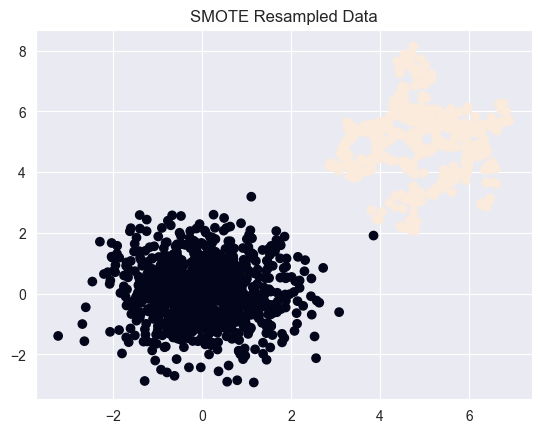

In [120]:
plt.scatter(oversample_df['feature1'], oversample_df['feature2'], c=oversample_df['target'])
plt.title('SMOTE Resampled Data')
plt.show()

# ### Encoding Categorical Variables

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [122]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [123]:
df[['sex', 'class', 'embark_town']].isnull().sum()
# Çift köşeli parantez yapısı şu şekilde çalışır: tek köşeli parantez kullanıldığında, pandas bir Series (tek boyutlu dizi) döndürürken, çift köşeli parantez kullanıldığında, bir DataFrame (iki boyutlu tablo) döndürür. Bu, özellikle birden fazla sütunu seçmek istediğinizde önemlidir. Çünkü ben bir Pandas serisi değil DataFrame içinden bir sütunun içidenki verileri almak istiyorum.

sex            0
class          0
embark_town    2
dtype: int64

In [124]:
df = df.dropna(subset=['embark_town']) # drop rows where 'embark_town'
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [125]:
df[['sex', 'class', 'embark_town']].isnull().sum()

sex            0
class          0
embark_town    0
dtype: int64

In [126]:
df['sex'].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [127]:
df['class'].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [128]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [129]:
# One-Hot Encoding

df_onehot = pd.get_dummies(df, columns=['sex', 'class', 'embark_town'], drop_first=True) # drop_first=True to avoid dummy variable trap
df_onehot

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,alive,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,man,True,NaN,no,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,woman,False,C,yes,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,woman,False,NaN,yes,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,S,woman,False,C,yes,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,man,True,NaN,no,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,man,True,NaN,no,True,True,True,False,False,True
887,1,1,19.0,0,0,30.0000,S,woman,False,B,yes,True,False,False,False,False,True
888,0,3,NaN,1,2,23.4500,S,woman,False,NaN,no,False,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,C,man,True,C,yes,True,True,False,False,False,False


In [130]:
df_onehot.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [131]:
# Label Encoding

label_encoder = LabelEncoder()
df_label = df.copy()

In [132]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [133]:
label_encoder.fit_transform(df_label['sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [134]:
df_label['sex'] = label_encoder.fit_transform(df_label['sex'])
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [135]:
df_oridinal = df.copy()
df_oridinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [136]:
class_order = ['Third', 'Second', 'First'] # Define the order of the classes

In [137]:
oridinal_encoder = OrdinalEncoder(categories=[class_order])

In [138]:
df_oridinal['class'] = oridinal_encoder.fit_transform(df_oridinal[['class']])
df_oridinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'OneHot Encoded'}, xlabel='sex_male'>

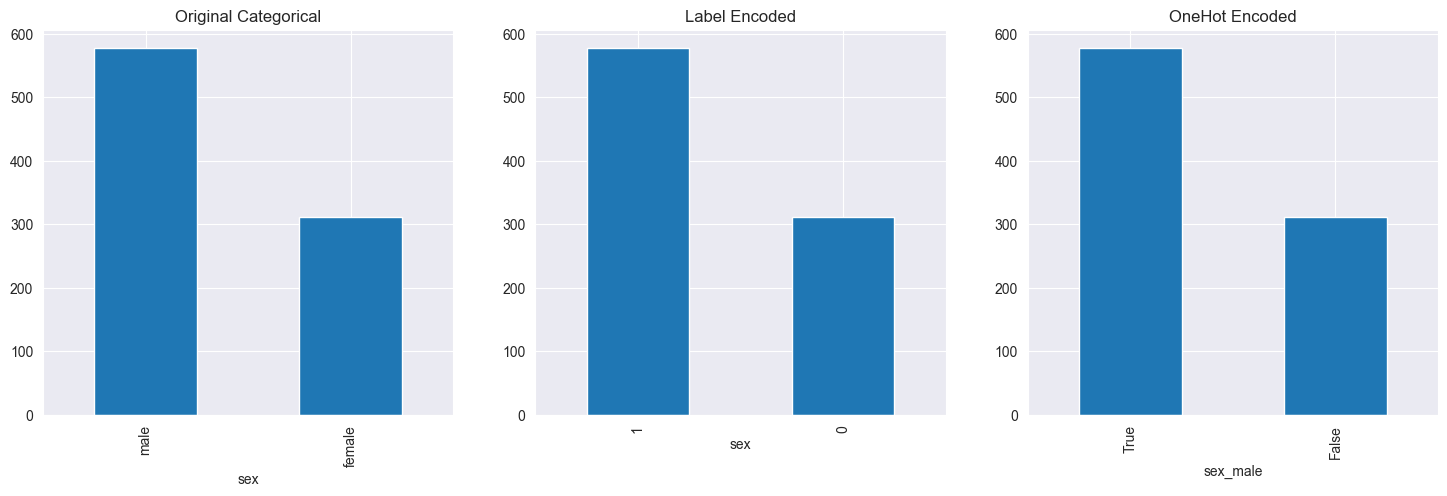

In [139]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
df['sex'].value_counts().plot(kind='bar', ax=axes[0], title='Original Categorical')
df_label['sex'].value_counts().plot(kind='bar', ax=axes[1], title='Label Encoded')
df_onehot['sex_male'].value_counts().plot(kind='bar', ax=axes[2], title='OneHot Encoded')